# 002_CWRK:Project Report
# 771767_C24_T1: Applied Artificial Intelligence

# MUHAMMAD HUZAIFA OWAIS

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv ("AI_Human.csv")

In [63]:
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


### 0 = Human, 1 = AI

In [64]:
df.rename(columns={'generated':'labels'}, inplace=True)

# Data Cleaning

### Checking Null Values

In [65]:
df.isna().sum()

text      0
labels    0
dtype: int64

### Checking duplicates

In [66]:
df.duplicated().sum()

0

Data is cleaned, no cleaning is required

# VISUALIZATION

### Checking class distribution

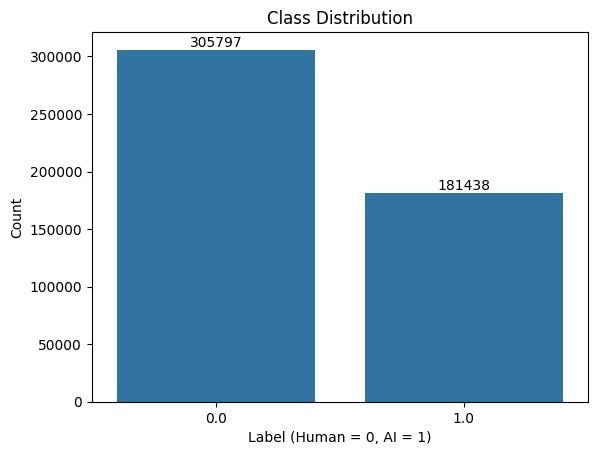

In [67]:
sns.countplot(data=df, x='labels')
plt.title('Class Distribution')
plt.xlabel('Label (Human = 0, AI = 1)')
plt.ylabel('Count')

#Add counts on top of the bars
for bar in plt.gca().patches:
    plt.gca().annotate(
        f'{int(bar.get_height())}', 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.savefig("Class Distribution.jpg")
plt.show()

### Selecting Random 50,000 samples from both classes due to less computational resources

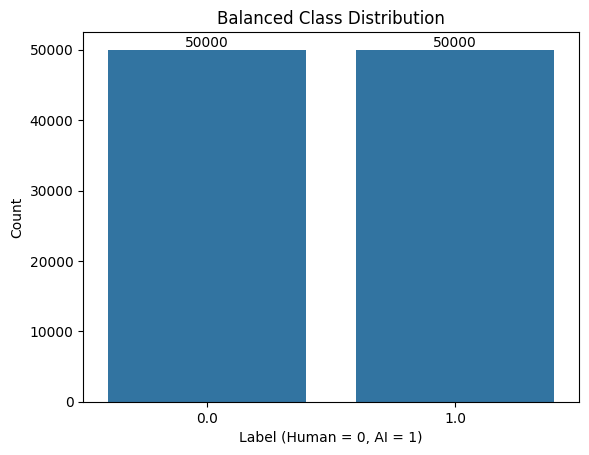

In [68]:
df_human = df[df['labels'] == 0]
df_ai = df[df['labels'] == 1]

# Randomly sample 50,000 samples from both classes
df_human_sampled = df_human.sample(n=50000, random_state=42)
df_ai_sampled = df_ai.sample(n=50000, random_state=42)

# Combining the sampled Human and AI classes
df_balanced = pd.concat([df_human_sampled, df_ai_sampled])

# Shuffling the data
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Plotting the balanced distribution
sns.countplot(data=df_balanced, x='labels')
plt.title('Balanced Class Distribution')
plt.xlabel('Label (Human = 0, AI = 1)')
plt.ylabel('Count')

# Annotate the bar counts on the plot
for bar in plt.gca().patches:
    plt.gca().annotate(
        f'{int(bar.get_height())}', 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
        ha='center', va='bottom', fontsize=10, color='black'
    )
    
# Save and show the plot
plt.savefig("Balanced_Class_Distribution_50000_samples.jpg")
plt.show()

# EDA

### Distribution of Essay Lengths

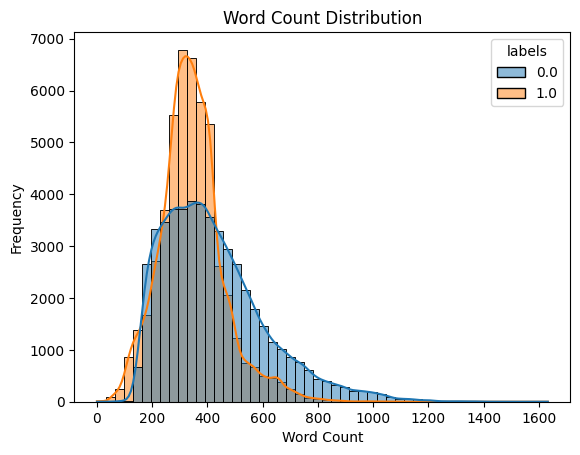

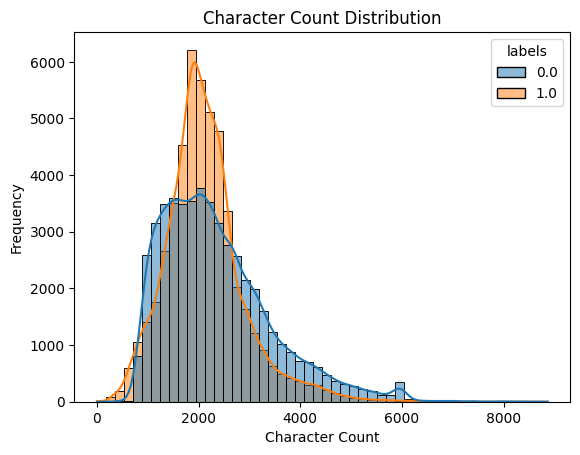

In [69]:
df_balanced['word_count'] = df_balanced['text'].apply(lambda x: len(x.split()))
df_balanced['char_count'] = df_balanced['text'].apply(len)

#Plotting word count distribution
sns.histplot(data=df_balanced, x='word_count', hue='labels', bins=50, kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.savefig("Word Count Distribution.jpg")
plt.show()

#Plotting character count distribution
sns.histplot(data=df_balanced, x='char_count', hue='labels', bins=50, kde=True)
plt.title('Character Count Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.savefig("Character Count Distribution.jpg")
plt.show()

### Most Frequent Words

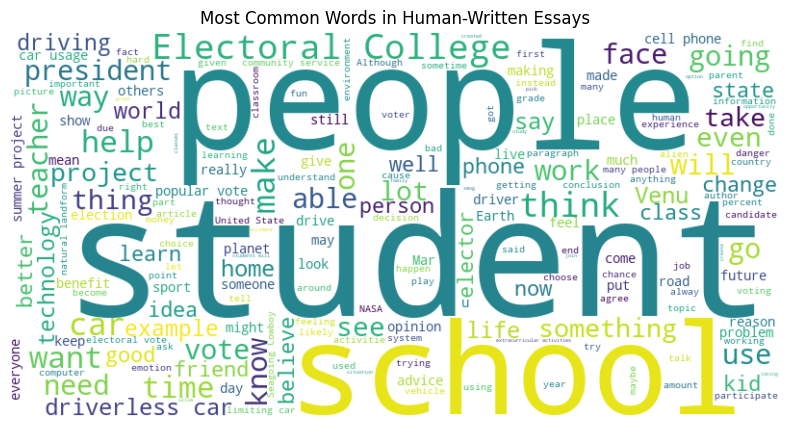

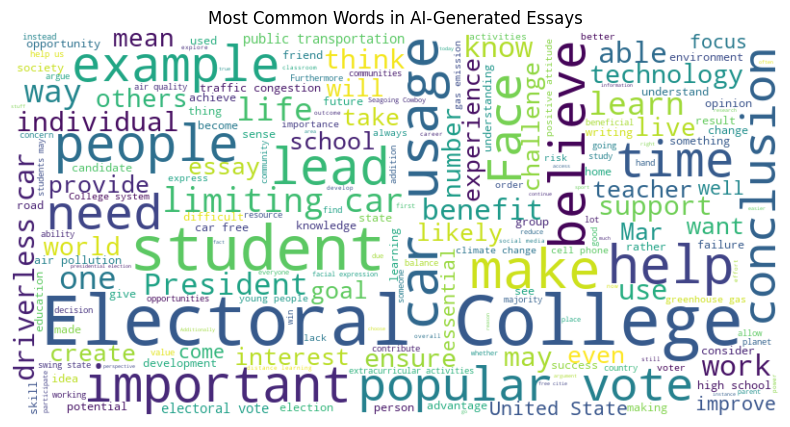

In [136]:
from wordcloud import WordCloud

#Generating word clouds for each class
human_text = ' '.join(df_balanced[df_balanced['labels'] == 0]['text'])
ai_text = ' '.join(df_balanced[df_balanced['labels'] == 1]['text'])

#Human-written word cloud
wordcloud_human = WordCloud(width=800, height=400, background_color='white').generate(human_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_human, interpolation='bilinear')
plt.title('Most Common Words in Human-Written Essays')
plt.axis('off')
plt.savefig("Most Common Words in Human-Written Essays.jpg")
plt.show()

#AI-written word cloud
wordcloud_ai = WordCloud(width=800, height=400, background_color='white').generate(ai_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ai, interpolation='bilinear')
plt.title('Most Common Words in AI-Generated Essays')
plt.axis('off')
plt.savefig("Most Common Words in AI-Written Essays.jpg")
plt.show()

### Sentence Length Analysis

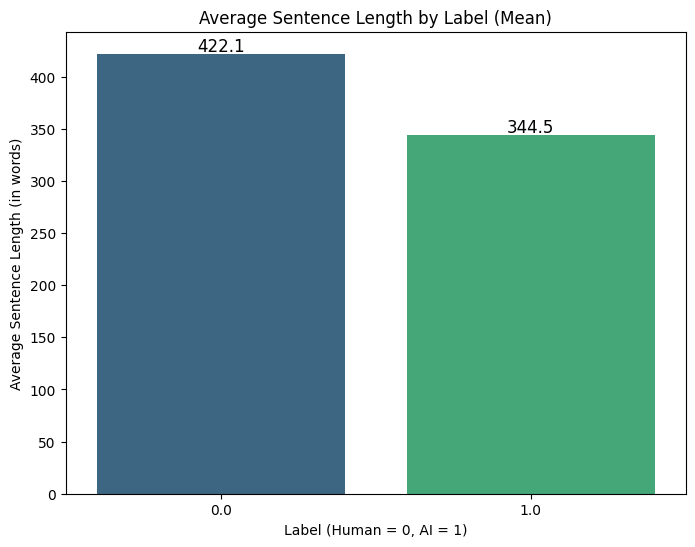

In [71]:
mean_sentence_length = df_balanced.groupby('labels')['word_count'].mean()

# Bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=mean_sentence_length.index, y=mean_sentence_length.values, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',  # Round to 1 decimal place
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title('Average Sentence Length by Label (Mean)')
plt.xlabel('Label (Human = 0, AI = 1)')
plt.ylabel('Average Sentence Length (in words)')
plt.savefig("Average Sentence Length by Label (Mean).jpg")
plt.show()


### TF-IDF Analysis

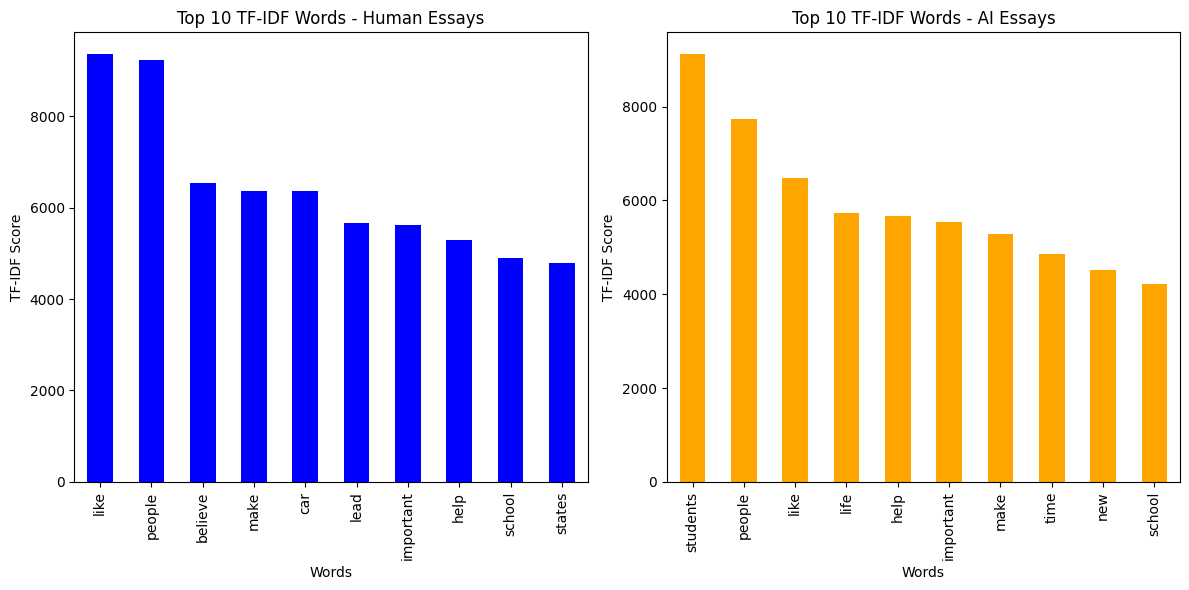

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

#Use TfidfVectorizer to compute TF-IDF scores for each word
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
human_tfidf = tfidf_vectorizer.fit_transform(df_balanced[df_balanced['labels'] == 0]['text'])
ai_tfidf = tfidf_vectorizer.fit_transform(df_balanced[df_balanced['labels'] == 1]['text'])

#Convert the results into DataFrames to easily visualize
human_tfidf_df = pd.DataFrame(human_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
ai_tfidf_df = pd.DataFrame(ai_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

#Compute the sum of TF-IDF scores for each word
human_tfidf_scores = human_tfidf_df.sum().sort_values(ascending=False)
ai_tfidf_scores = ai_tfidf_df.sum().sort_values(ascending=False)

#Plotting the top TF-IDF words for human and AI essays
plt.figure(figsize=(12, 6))

#Plot for Human
plt.subplot(1, 2, 1)
human_tfidf_scores.head(10).plot(kind='bar', color='blue')
plt.title('Top 10 TF-IDF Words - Human Essays')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')

#Plot for AI
plt.subplot(1, 2, 2)
ai_tfidf_scores.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 TF-IDF Words - AI Essays')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.tight_layout()
plt.savefig("Top 10 TF-IDF Words.jpg")
plt.show()


# TRADITIONAL MACHINE LEARNING APPROACH

In [73]:
import warnings
warnings.filterwarnings('ignore')

## Pre-Processing

In [74]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

#NLTK resources
nltk.download('punkt')         # For tokenization
nltk.download('punkt_tab')
nltk.download('stopwords')     # For stopword removal
nltk.download('wordnet')       # For lemmatization

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocessing function for cleaning, tokenizing, and lemmatizing the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove non-alphabetic characters (e.g., numbers, punctuation)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize the tokens (get the base form of words)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join words back into a single string
    return ' '.join(tokens)

# First, split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df_balanced['text'], df_balanced['labels'], test_size=0.2, random_state=42)

# Apply the preprocessing function to the training and testing text
X_train_cleaned = X_train.apply(preprocess_text)
X_test_cleaned = X_test.apply(preprocess_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features to avoid overfitting

# Fit and transform the training set, and transform the test set
X_train_tfidf = vectorizer.fit_transform(X_train_cleaned)
X_test_tfidf = vectorizer.transform(X_test_cleaned)

# Print the shape of the TF-IDF matrices
print(f"TF-IDF Train Shape: {X_train_tfidf.shape}")
print(f"TF-IDF Test Shape: {X_test_tfidf.shape}")

# Check the size of the training and test sets
print(f"Training set size: {X_train_tfidf.shape[0]}")
print(f"Test set size: {X_test_tfidf.shape[0]}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


TF-IDF Train Shape: (80000, 5000)
TF-IDF Test Shape: (20000, 5000)
Training set size: 80000
Test set size: 20000


## 1) Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg_model = LogisticRegression(max_iter=100)
logreg_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_lr = logreg_model.predict(X_test_tfidf)

In [92]:
def evaluate_model(y_true, y_pred, model_name="Model", save_path="confusion_matrix.png"):
    """
    Evaluates a classification model by calculating accuracy, classification report,
    and plotting the confusion matrix with the model name in the title.
    """
    
    # Calculate and print accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'AI'], yticklabels=['Human', 'AI'])
    plt.title(f'Confusion Matrix ({model_name})')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    
    # Save and display the plot
    plt.savefig(save_path, bbox_inches='tight')
    print(f"Confusion matrix plot saved to {save_path}")
    plt.show()


Accuracy: 0.9876

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      9922
         1.0       0.99      0.98      0.99     10078

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000

Confusion matrix plot saved to Confusion Matrix (Logistic Regression).png


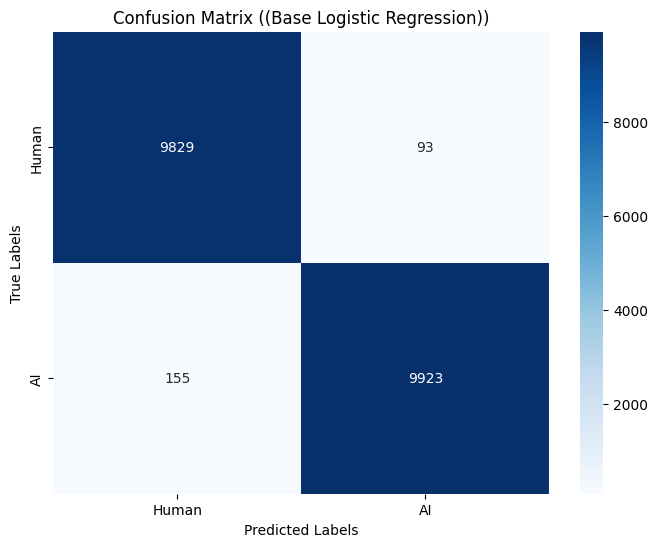

In [150]:
evaluate_model(y_test, y_pred_lr, model_name="(Base Logistic Regression)", save_path="Confusion Matrix (Logistic Regression).png")

### Performing 5-fold cross-validation

In [77]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logreg_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Cross-validation scores:", cv_scores)

# Print the mean cross-validation score
print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.4f}")

# standard deviation of the cross-validation scores
print(f"Standard deviation of cross-validation accuracy: {np.std(cv_scores):.4f}")


Cross-validation scores: [0.9854375 0.98575   0.9864375 0.9840625 0.9845   ]
Mean cross-validation accuracy: 0.9852
Standard deviation of cross-validation accuracy: 0.0009


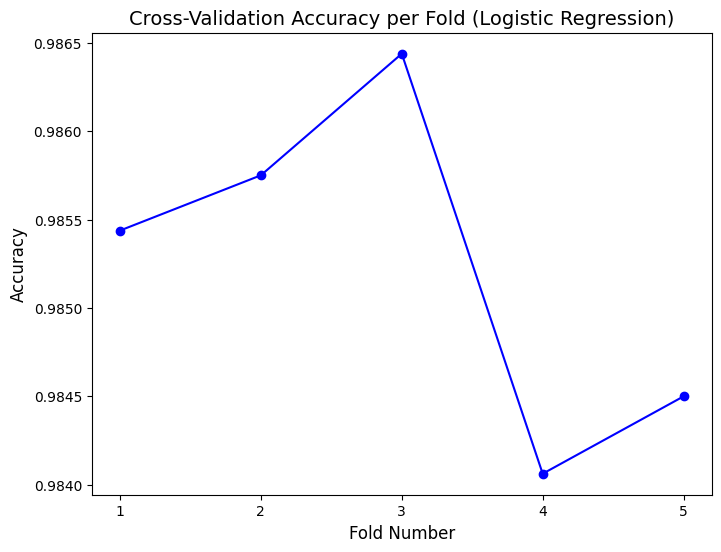

In [141]:
# Plotting the accuracy for each fold
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', color='b', label='Accuracy per fold')

# Adding labels and title
plt.title('Cross-Validation Accuracy per Fold (Logistic Regression)', fontsize=14)
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(range(1, 6))  # Ensuring x-axis ticks are from 1 to 5
# Save the plot
plt.savefig("Five_fold_Logistic.png")
# Show the plot
plt.show()

### Hyperparameter Tunning

In [85]:
from sklearn.model_selection import GridSearchCV

# Parameters to check
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'max_iter': [50, 100, 500, 1000]  # Maximum number of iterations for optimization
}

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr , cv=5)

# Perform grid search on the training data
grid_search_lr.fit(X_train_tfidf, y_train)

# Get the best hyperparameters & Accuracy 
print("Best Hyperparameters: ", grid_search_lr.best_params_)
print("Best Logistic Regression Accuracy:", grid_search_lr.best_score_)

Best Hyperparameters:  {'C': 100, 'max_iter': 100}
Best Logistic Regression Accuracy: 0.99045


### Prediction using best parameters

In [100]:
# Initialize Logistic Regression with the best hyperparameters
logreg_best_lr = LogisticRegression(C=best_params_lr['C'], max_iter=best_params_lr['max_iter'])

# Fit the model with the training data
logreg_best_lr.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_best_lr = logreg_best_lr.predict(X_test_tfidf)

Accuracy: 0.9925

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9922
         1.0       0.99      0.99      0.99     10078

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000

Confusion matrix plot saved to Confusion Matrix (Tuned Logistic Regression).png


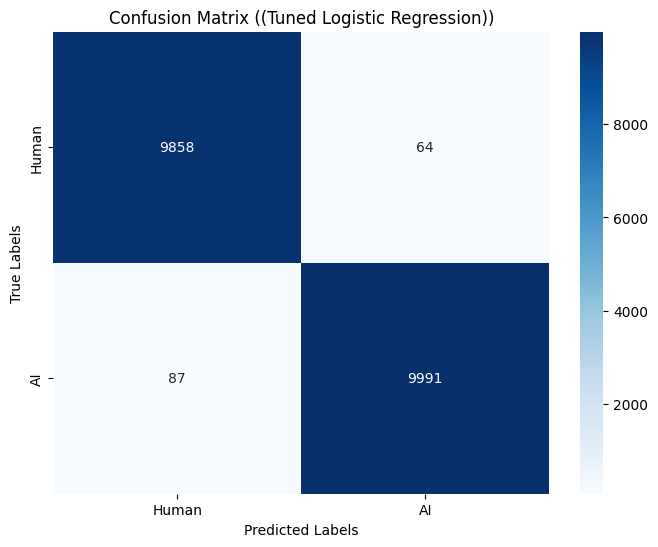

In [158]:
evaluate_model(y_test, y_pred_best_lr, model_name="(Tuned Logistic Regression)", save_path="Confusion Matrix (Tuned Logistic Regression).png")

## 2) Naive Bayes

In [96]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
# Train model on train set
nb_model.fit(X_train_tfidf, y_train)
# Prediction on test set
y_pred_nb = nb_model.predict(X_test_tfidf)

Accuracy: 0.9421

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      9922
         1.0       0.96      0.92      0.94     10078

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000

Confusion matrix plot saved to Confusion Matrix (Naive Bayes).png


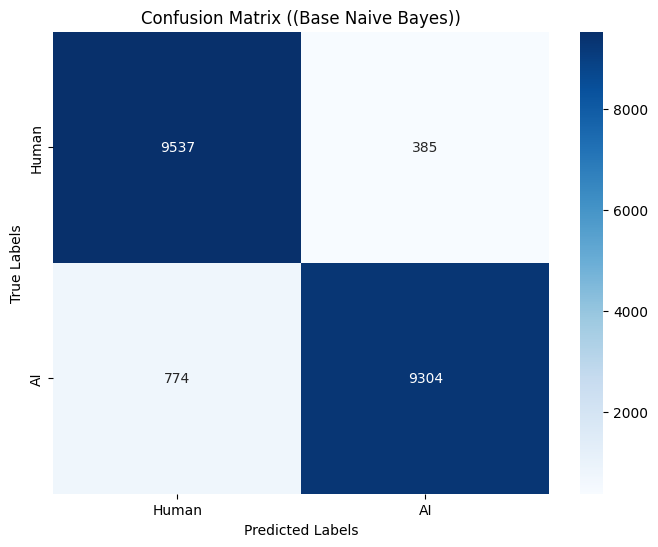

In [151]:
evaluate_model(y_test, y_pred_nb, model_name="(Base Naive Bayes)", save_path="Confusion Matrix (Naive Bayes).png")

### Performing 5-fold cross-validation

In [98]:
cv_scores_nb = cross_val_score(MultinomialNB(), X_train_tfidf, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Cross-validation scores (Naive Bayes):", cv_scores_nb)

# Print the mean cross-validation score
print(f"Mean cross-validation accuracy (Naive Bayes): {np.mean(cv_scores_nb):.4f}")

# Print the standard deviation of cross-validation scores
print(f"Standard deviation of cross-validation accuracy (Naive Bayes): {np.std(cv_scores_nb):.4f}")

Cross-validation scores (Naive Bayes): [0.9423125 0.9411875 0.944125  0.94375   0.9435625]
Mean cross-validation accuracy (Naive Bayes): 0.9430
Standard deviation of cross-validation accuracy (Naive Bayes): 0.0011


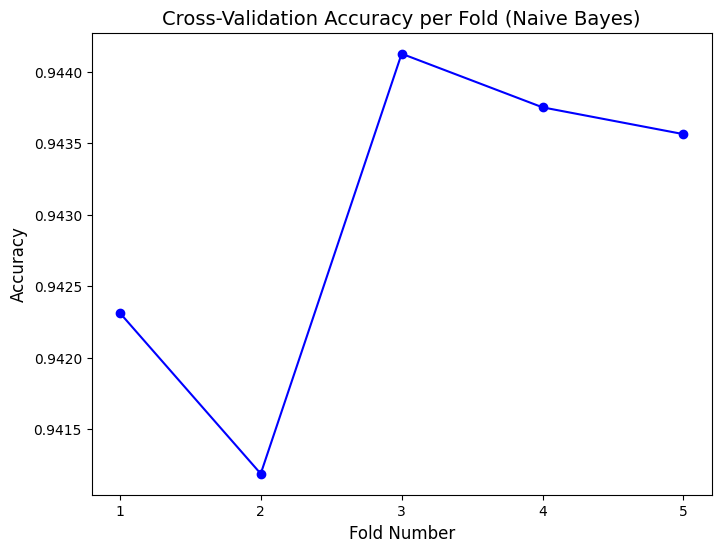

In [139]:
# Plotting the accuracy for each fold
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), cv_scores_nb, marker='o', linestyle='-', color='b', label='Accuracy per fold')

# Adding labels and title
plt.title('Cross-Validation Accuracy per Fold (Naive Bayes)', fontsize=14)
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(range(1, 6))  # Ensuring x-axis ticks are from 1 to 5
plt.savefig("Five_fold_Naive.png")
plt.show()

### Hyperparameter Tunning

In [99]:
# Parameters to check for Naive Bayes
param_grid_nb = {
    'alpha': [0.01, 0.1, 0.5, 1, 10]  # Smoothing parameter
}

grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5)

# Perform grid search on the training data
grid_search_nb.fit(X_train_tfidf, y_train)

# Get the best hyperparameters & accuracy
print("Best Hyperparameters (Naive Bayes):", grid_search_nb.best_params_)
print("Best Naive Bayes Accuracy:", grid_search_nb.best_score_)

Best Hyperparameters (Naive Bayes): {'alpha': 0.01}
Best Naive Bayes Accuracy: 0.9445499999999999


### Prediction using best parameters

Accuracy: 0.9435

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      9922
         1.0       0.96      0.93      0.94     10078

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000

Confusion matrix plot saved to Confusion Matrix (Tunned Naive Bayes).png


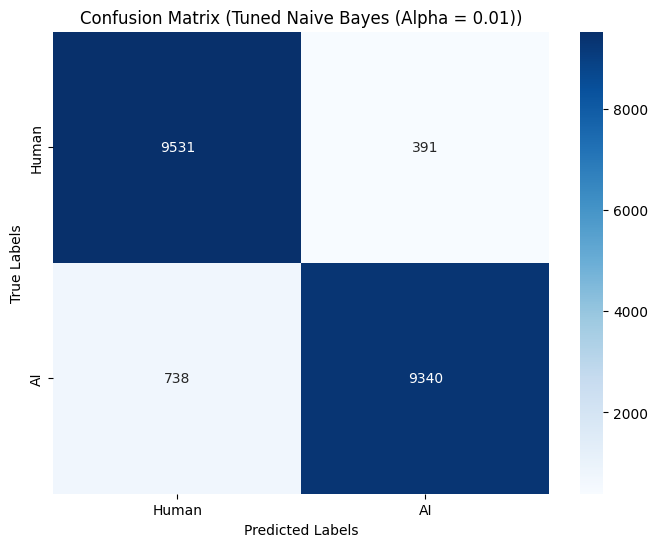

In [152]:
# Initialize Naive Bayes with the best hyperparameters
nb_best_model = MultinomialNB(alpha=0.01)

# Fit the model with the training data
nb_best_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_best_nb = nb_best_model.predict(X_test_tfidf)

# Evaluate the model
evaluate_model(y_test, y_pred_best_nb, model_name="Tuned Naive Bayes (Alpha = 0.01)", save_path="Confusion Matrix (Tunned Naive Bayes).png")

# DEEP LEARNING APPROCH

## Preprocessing

In [106]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Initialize the tokenizer
tokenizer = Tokenizer(num_words=10000)
#Fit
tokenizer.fit_on_texts(X_train)

#Convert text to sequences of integers
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

#Padding Sequences
X_train_padded = pad_sequences(X_train_tokens, maxlen=100, padding='post')
X_test_padded = pad_sequences(X_test_tokens, maxlen=100, padding='post')

#Label Preparation
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print shapes of preprocessed data
print(f"X_train_padded shape: {X_train_padded.shape}")
print(f"X_test_padded shape: {X_test_padded.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train_padded shape: (80000, 100)
X_test_padded shape: (20000, 100)
y_train shape: (80000,)
y_test shape: (20000,)


## 1) LSTM

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

#LSTM Model
model_LSTM = Sequential()
model_LSTM.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model_LSTM.add(LSTM(128, return_sequences=False, dropout=0.2))          
model_LSTM.add(Dense(64, activation='relu'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(1, activation='sigmoid'))

#Compiling
model_LSTM.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

#Training
history = model_LSTM.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 280s 110ms/step - accuracy: 0.9336 - loss: 0.1723 - val_accuracy: 0.9797 - val_loss: 0.0570
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 275s 110ms/step - accuracy: 0.9850 - loss: 0.0472 - val_accuracy: 0.9662 - val_loss: 0.0793
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 273s 109ms/step - accuracy: 0.9912 - loss: 0.0281 - val_accuracy: 0.9879 - val_loss: 0.0436
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 286s 115ms/step - accuracy: 0.9943 - loss: 0.0188 - val_accuracy: 0.9893 - val_loss: 0.0374
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 312s 111ms/step - accuracy: 0.9964 - loss: 0.0113 - val_accuracy: 0.9890 - val_loss: 0.0378


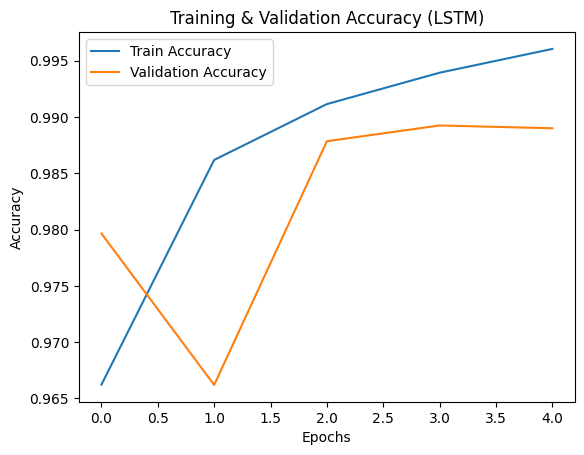

In [113]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Training & Validation Accuracy (LSTM).jpg')
plt.show()

625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step
Accuracy: 0.9890

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      9922
         1.0       0.99      0.98      0.99     10078

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000

Confusion matrix plot saved to confusion_matrix_lstm.png


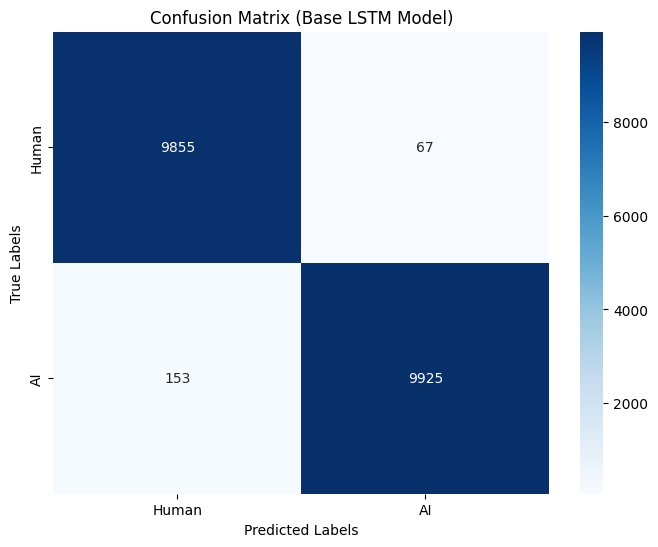

In [154]:
# Predict on the test set
y_pred_lstm = model_LSTM.predict(X_test_padded)

# Convert predictions to binary (0 or 1)
y_pred_lstm_binary = (y_pred_lstm > 0.5).astype(int)  # Sigmoid outputs values between 0 and 1

# Evaluate the model
evaluate_model(y_test, y_pred_lstm_binary, model_name="Base LSTM Model", save_path="confusion_matrix_lstm.png")

### Hyperparameter Tunning

### Changing units in LSTM layer (128->64)

In [118]:
#LSTM Model
model_LSTM1 = Sequential()
model_LSTM1.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model_LSTM1.add(LSTM(64, return_sequences=False, dropout=0.2))          
model_LSTM1.add(Dense(64, activation='relu'))
model_LSTM1.add(Dropout(0.2))
model_LSTM1.add(Dense(1, activation='sigmoid'))

#Compiling
model_LSTM1.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

#Training
history1 = model_LSTM1.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 105s 41ms/step - accuracy: 0.9391 - loss: 0.1520 - val_accuracy: 0.9844 - val_loss: 0.0514
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 100s 40ms/step - accuracy: 0.9881 - loss: 0.0366 - val_accuracy: 0.9855 - val_loss: 0.0432
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 100s 40ms/step - accuracy: 0.9916 - loss: 0.0264 - val_accuracy: 0.9887 - val_loss: 0.0385
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 101s 40ms/step - accuracy: 0.9934 - loss: 0.0212 - val_accuracy: 0.9893 - val_loss: 0.0436
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 101s 40ms/step - accuracy: 0.9960 - loss: 0.0122 - val_accuracy: 0.9843 - val_loss: 0.0690


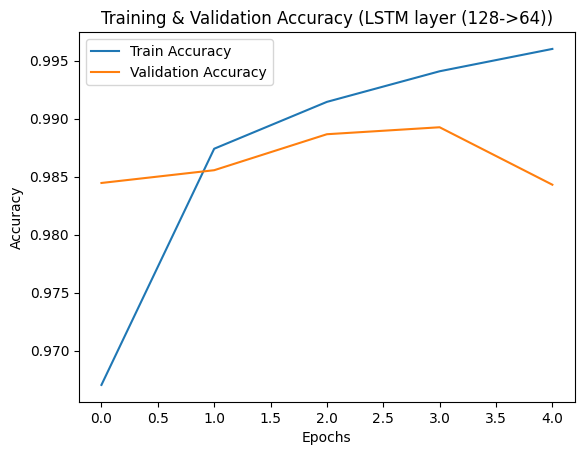

In [121]:
# Plot training & validation accuracy
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (LSTM layer (128->64))')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Training & Validation Accuracy (LSTM layer (128 to 64)).jpg')
plt.show()

### Changing Dropout rate (20%->30%)

In [122]:
#LSTM Model
model_LSTM2 = Sequential()
model_LSTM2.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model_LSTM2.add(LSTM(128, return_sequences=False, dropout=0.3))          
model_LSTM2.add(Dense(64, activation='relu'))
model_LSTM2.add(Dropout(0.3))
model_LSTM2.add(Dense(1, activation='sigmoid'))

#Compiling
model_LSTM2.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

#Training
history2 = model_LSTM2.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 190s 74ms/step - accuracy: 0.9291 - loss: 0.1733 - val_accuracy: 0.9849 - val_loss: 0.0449
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 184s 74ms/step - accuracy: 0.9871 - loss: 0.0405 - val_accuracy: 0.9885 - val_loss: 0.0383
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 187s 75ms/step - accuracy: 0.9910 - loss: 0.0301 - val_accuracy: 0.9865 - val_loss: 0.0419
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 200s 74ms/step - accuracy: 0.9937 - loss: 0.0202 - val_accuracy: 0.9909 - val_loss: 0.0326
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 189s 75ms/step - accuracy: 0.9958 - loss: 0.0142 - val_accuracy: 0.9901 - val_loss: 0.0398


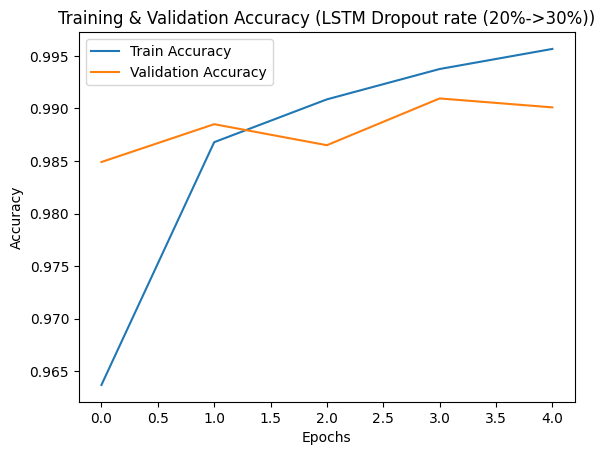

In [123]:
# Plot training & validation accuracy
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (LSTM Dropout rate (20%->30%))')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Training & Validation Accuracy (LSTM Dropout rate (0.2 to 0.3)).jpg')
plt.show()

### Changing Learning rate (0.001->0.0005) - BEST RESULT

In [124]:
#LSTM Model
model_LSTM3 = Sequential()
model_LSTM3.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model_LSTM3.add(LSTM(128, return_sequences=False, dropout=0.2))          
model_LSTM3.add(Dense(64, activation='relu'))
model_LSTM3.add(Dropout(0.2))
model_LSTM3.add(Dense(1, activation='sigmoid'))

#Compiling
optimizer = Adam(learning_rate=0.0005)
model_LSTM3.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#Training
history3 = model_LSTM3.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 190s 75ms/step - accuracy: 0.9275 - loss: 0.1676 - val_accuracy: 0.9848 - val_loss: 0.0455
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 185s 74ms/step - accuracy: 0.9884 - loss: 0.0381 - val_accuracy: 0.9789 - val_loss: 0.0663
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 185s 74ms/step - accuracy: 0.9914 - loss: 0.0266 - val_accuracy: 0.9865 - val_loss: 0.0514
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 186s 75ms/step - accuracy: 0.9940 - loss: 0.0192 - val_accuracy: 0.9890 - val_loss: 0.0396
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 186s 75ms/step - accuracy: 0.9955 - loss: 0.0151 - val_accuracy: 0.9904 - val_loss: 0.0342


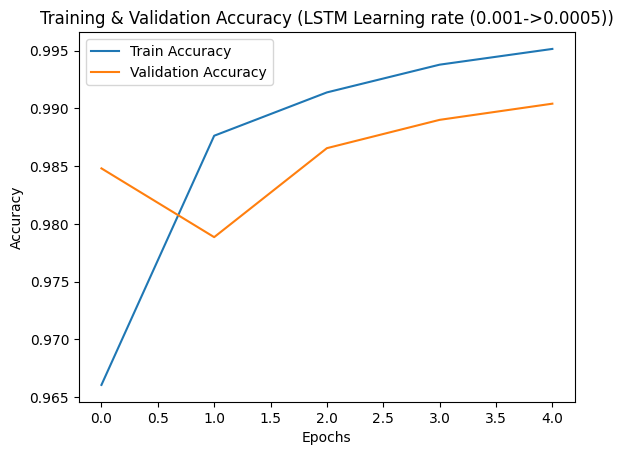

In [125]:
# Plot training & validation accuracy
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (LSTM Learning rate (0.001->0.0005))')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Training & Validation Accuracy (LSTM Learning rate (0.001 to 0.0005)).jpg')
plt.show()

625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step
Accuracy: 0.9904

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9922
         1.0       0.99      0.99      0.99     10078

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000

Confusion matrix plot saved to confusion_matrix_Best_lstm.png


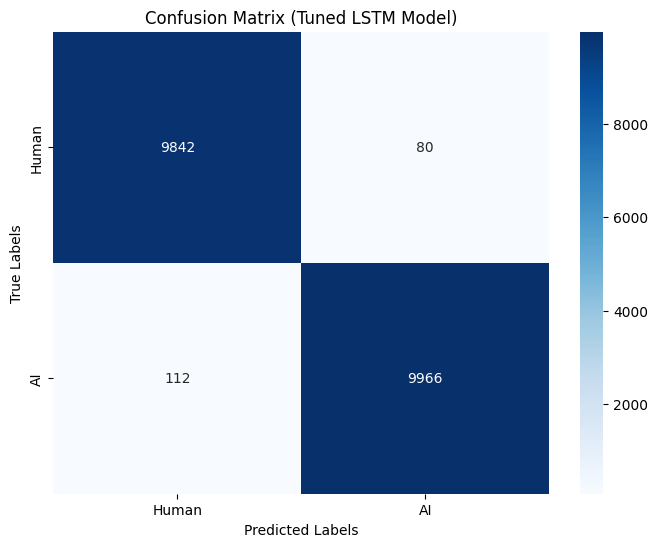

In [153]:
# Predict on the test set
y_pred_lstm_best = model_LSTM3.predict(X_test_padded)

# Convert predictions to binary (0 or 1)
y_pred_lstm_best_binary = (y_pred_lstm_best > 0.5).astype(int)  # Sigmoid outputs values between 0 and 1

# Evaluate the model
evaluate_model(y_test, y_pred_lstm_best_binary, model_name="Tuned LSTM Model", save_path="confusion_matrix_Best_lstm.png")

### Changing Batch Size (32->64)

In [126]:
#LSTM Model
model_LSTM4 = Sequential()
model_LSTM4.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model_LSTM4.add(LSTM(128, return_sequences=False, dropout=0.2))          
model_LSTM4.add(Dense(64, activation='relu'))
model_LSTM4.add(Dropout(0.2))
model_LSTM4.add(Dense(1, activation='sigmoid'))

#Compiling
model_LSTM4.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

#Training
history4 = model_LSTM4.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 145s 114ms/step - accuracy: 0.9312 - loss: 0.1615 - val_accuracy: 0.9858 - val_loss: 0.0442
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 115ms/step - accuracy: 0.9889 - loss: 0.0364 - val_accuracy: 0.9855 - val_loss: 0.0440
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 113ms/step - accuracy: 0.9922 - loss: 0.0273 - val_accuracy: 0.9886 - val_loss: 0.0378
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 114ms/step - accuracy: 0.9932 - loss: 0.0214 - val_accuracy: 0.9898 - val_loss: 0.0359
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 115ms/step - accuracy: 0.9956 - loss: 0.0144 - val_accuracy: 0.9876 - val_loss: 0.0410


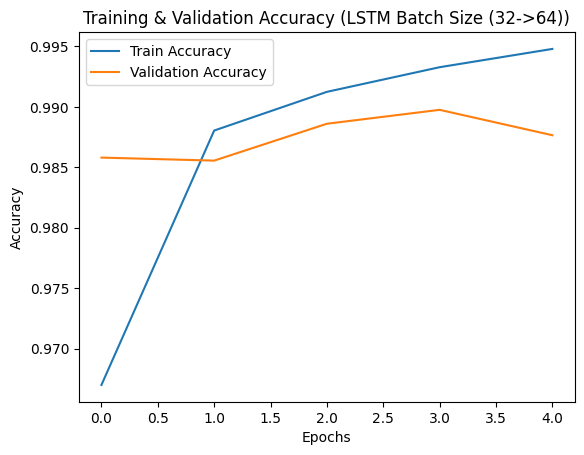

In [127]:
# Plot training & validation accuracy
plt.plot(history4.history['accuracy'], label='Train Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (LSTM Batch Size (32->64))')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Training & Validation Accuracy (LSTM Batch Size (32 to 64)).jpg')
plt.show()

## 2) GRU

In [114]:
from tensorflow.keras.layers import GRU

#GRU Model
model_GRU = Sequential()
model_GRU.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model_GRU.add(GRU(128, return_sequences=False, dropout=0.2))
model_GRU.add(Dense(64, activation='relu'))
model_GRU.add(Dropout(0.2))
model_GRU.add(Dense(1, activation='sigmoid'))

#Compiling
model_GRU.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

#Training
history_GRU = model_GRU.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 267s 105ms/step - accuracy: 0.9279 - loss: 0.1699 - val_accuracy: 0.9874 - val_loss: 0.0405
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 245s 98ms/step - accuracy: 0.9909 - loss: 0.0320 - val_accuracy: 0.9858 - val_loss: 0.0418
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 176s 70ms/step - accuracy: 0.9945 - loss: 0.0185 - val_accuracy: 0.9905 - val_loss: 0.0390
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 199s 69ms/step - accuracy: 0.9964 - loss: 0.0105 - val_accuracy: 0.9897 - val_loss: 0.0355
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 174s 70ms/step - accuracy: 0.9980 - loss: 0.0065 - val_accuracy: 0.9899 - val_loss: 0.0307


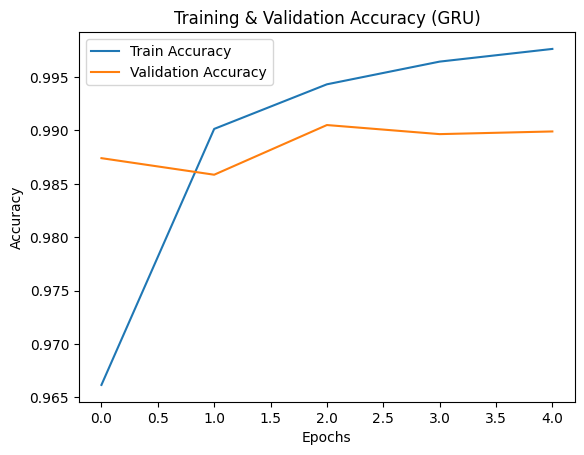

In [115]:
# Plot training & validation accuracy
plt.plot(history_GRU.history['accuracy'], label='Train Accuracy')
plt.plot(history_GRU.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (GRU)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Training & Validation Accuracy (GRU).jpg')
plt.show()

625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step
Accuracy: 0.9899

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9922
         1.0       0.99      0.99      0.99     10078

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000

Confusion matrix plot saved to confusion_matrix_gru.png


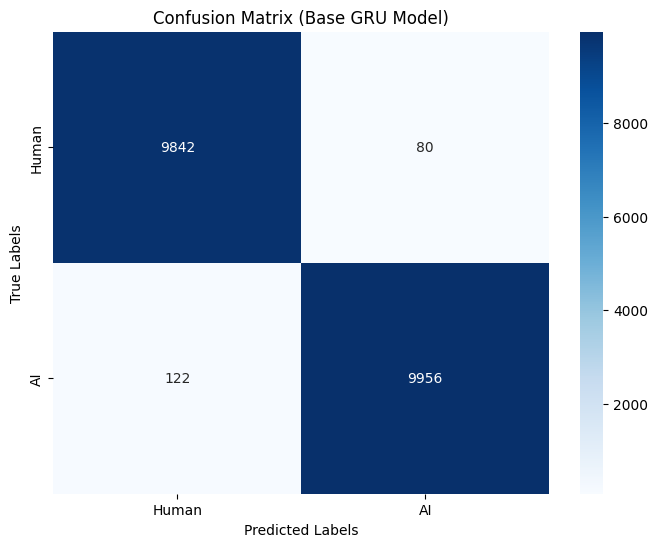

In [155]:
# Predict on the test set
y_pred_gru = model_GRU.predict(X_test_padded)

# Convert predictions to binary (0 or 1)
y_pred_gru_binary = (y_pred_gru > 0.5).astype(int)

# Evaluate the GRU model
evaluate_model(y_test, y_pred_gru_binary, model_name="Base GRU Model", save_path="confusion_matrix_gru.png")

### Hyperparameter Tunning

### Changing units in GRU layer (128->64)

In [128]:
#GRU Model
model_GRU1 = Sequential()
model_GRU1.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model_GRU1.add(GRU(64, return_sequences=False, dropout=0.2))
model_GRU1.add(Dense(64, activation='relu'))
model_GRU1.add(Dropout(0.2))
model_GRU1.add(Dense(1, activation='sigmoid'))

#Compiling
model_GRU1.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

#Training
history_GRU1 = model_GRU1.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 107s 42ms/step - accuracy: 0.9253 - loss: 0.1701 - val_accuracy: 0.9851 - val_loss: 0.0461
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 118s 47ms/step - accuracy: 0.9895 - loss: 0.0331 - val_accuracy: 0.9905 - val_loss: 0.0331
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 107s 43ms/step - accuracy: 0.9952 - loss: 0.0157 - val_accuracy: 0.9852 - val_loss: 0.0484
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 110s 44ms/step - accuracy: 0.9976 - loss: 0.0069 - val_accuracy: 0.9918 - val_loss: 0.0300
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 104s 42ms/step - accuracy: 0.9980 - loss: 0.0064 - val_accuracy: 0.9912 - val_loss: 0.0367


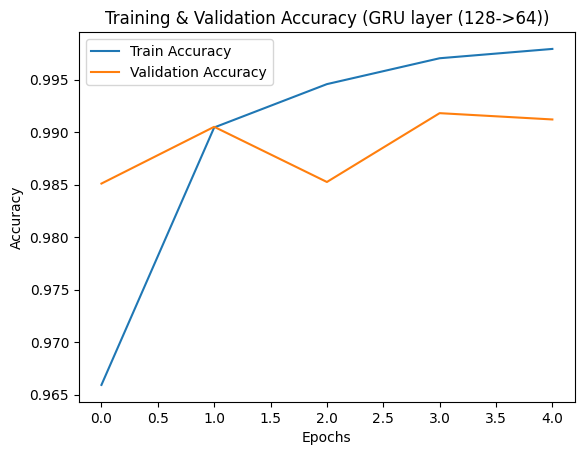

In [129]:
# Plot training & validation accuracy
plt.plot(history_GRU1.history['accuracy'], label='Train Accuracy')
plt.plot(history_GRU1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (GRU layer (128->64))')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Training & Validation Accuracy (GRU layer (128 to 64)).jpg')
plt.show()

### Changing Dropout rate (20%->30%)

In [130]:
#GRU Model
model_GRU2 = Sequential()
model_GRU2.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model_GRU2.add(GRU(128, return_sequences=False, dropout=0.3))
model_GRU2.add(Dense(64, activation='relu'))
model_GRU2.add(Dropout(0.3))
model_GRU2.add(Dense(1, activation='sigmoid'))

#Compiling
model_GRU2.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

#Training
history_GRU2 = model_GRU2.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 170s 67ms/step - accuracy: 0.9217 - loss: 0.1779 - val_accuracy: 0.9825 - val_loss: 0.0499
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 169s 68ms/step - accuracy: 0.9882 - loss: 0.0365 - val_accuracy: 0.9849 - val_loss: 0.0459
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 170s 68ms/step - accuracy: 0.9949 - loss: 0.0168 - val_accuracy: 0.9901 - val_loss: 0.0276
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 170s 68ms/step - accuracy: 0.9964 - loss: 0.0103 - val_accuracy: 0.9918 - val_loss: 0.0318
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 171s 68ms/step - accuracy: 0.9977 - loss: 0.0072 - val_accuracy: 0.9912 - val_loss: 0.0346


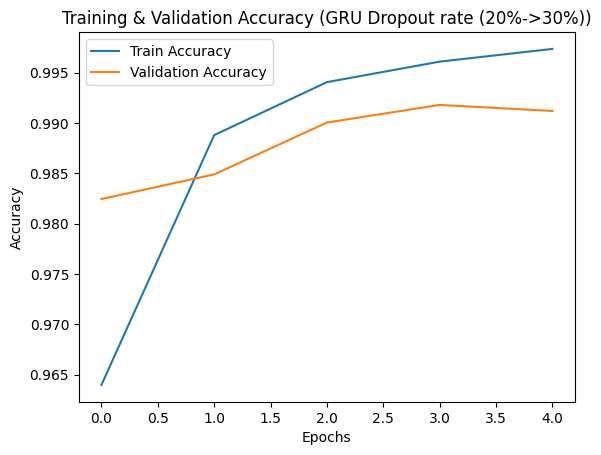

In [131]:
# Plot training & validation accuracy
plt.plot(history_GRU2.history['accuracy'], label='Train Accuracy')
plt.plot(history_GRU2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (GRU Dropout rate (20%->30%))')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Training & Validation Accuracy (GRU Dropout rate (0.2 to 0.3)).jpg')
plt.show()

### Changing Learning rate (0.001->0.0005)

In [132]:
#GRU Model
model_GRU3 = Sequential()
model_GRU3.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model_GRU3.add(GRU(128, return_sequences=False, dropout=0.2))
model_GRU3.add(Dense(64, activation='relu'))
model_GRU3.add(Dropout(0.2))
model_GRU3.add(Dense(1, activation='sigmoid'))

#Compiling
optimizer = Adam(learning_rate=0.0005)
model_GRU3.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#Training
history_GRU3 = model_GRU3.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 172s 68ms/step - accuracy: 0.9123 - loss: 0.1917 - val_accuracy: 0.9841 - val_loss: 0.0520
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 170s 68ms/step - accuracy: 0.9875 - loss: 0.0391 - val_accuracy: 0.9891 - val_loss: 0.0365
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 170s 68ms/step - accuracy: 0.9935 - loss: 0.0210 - val_accuracy: 0.9865 - val_loss: 0.0412
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 172s 69ms/step - accuracy: 0.9957 - loss: 0.0147 - val_accuracy: 0.9901 - val_loss: 0.0350
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 173s 69ms/step - accuracy: 0.9975 - loss: 0.0080 - val_accuracy: 0.9901 - val_loss: 0.0370


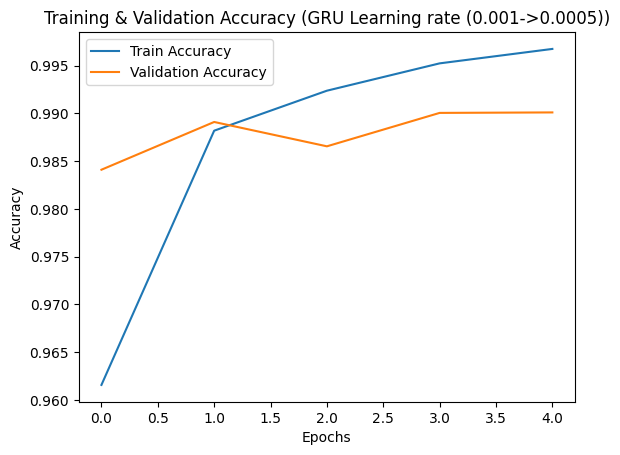

In [133]:
# Plot training & validation accuracy
plt.plot(history_GRU3.history['accuracy'], label='Train Accuracy')
plt.plot(history_GRU3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (GRU Learning rate (0.001->0.0005))')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Training & Validation Accuracy (GRU Learning rate (0.001 to 0.0005)).jpg')
plt.show()

### Changing Batch Size (32->64) - BEST RESULT

In [134]:
#GRU Model
model_GRU4 = Sequential()
model_GRU4.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model_GRU4.add(GRU(128, return_sequences=False, dropout=0.2))
model_GRU4.add(Dense(64, activation='relu'))
model_GRU4.add(Dropout(0.2))
model_GRU4.add(Dense(1, activation='sigmoid'))

#Compiling
model_GRU4.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

#Training
history_GRU4 = model_GRU4.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 150s 117ms/step - accuracy: 0.9145 - loss: 0.1868 - val_accuracy: 0.9848 - val_loss: 0.0449
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 155s 124ms/step - accuracy: 0.9893 - loss: 0.0348 - val_accuracy: 0.9888 - val_loss: 0.0345
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 150s 120ms/step - accuracy: 0.9938 - loss: 0.0203 - val_accuracy: 0.9903 - val_loss: 0.0310
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 164s 131ms/step - accuracy: 0.9968 - loss: 0.0109 - val_accuracy: 0.9909 - val_loss: 0.0301
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 161s 129ms/step - accuracy: 0.9977 - loss: 0.0077 - val_accuracy: 0.9913 - val_loss: 0.0336


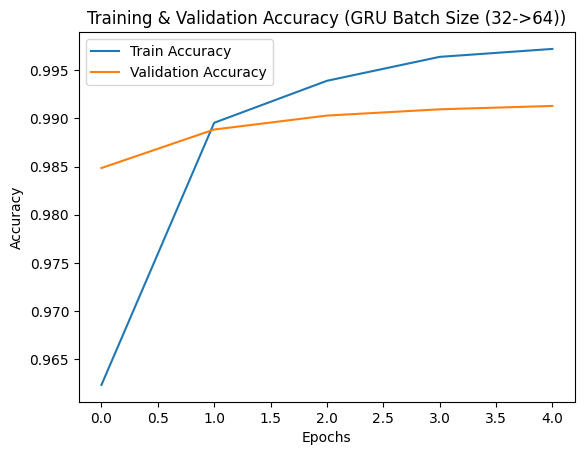

In [135]:
# Plot training & validation accuracy
plt.plot(history_GRU4.history['accuracy'], label='Train Accuracy')
plt.plot(history_GRU4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy (GRU Batch Size (32->64))')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Training & Validation Accuracy (GRU Batch Size (32 to 64)).jpg')
plt.show()

625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step
Accuracy: 0.9913

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9922
         1.0       0.99      0.99      0.99     10078

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000

Confusion matrix plot saved to confusion_matrix_best_gru.png


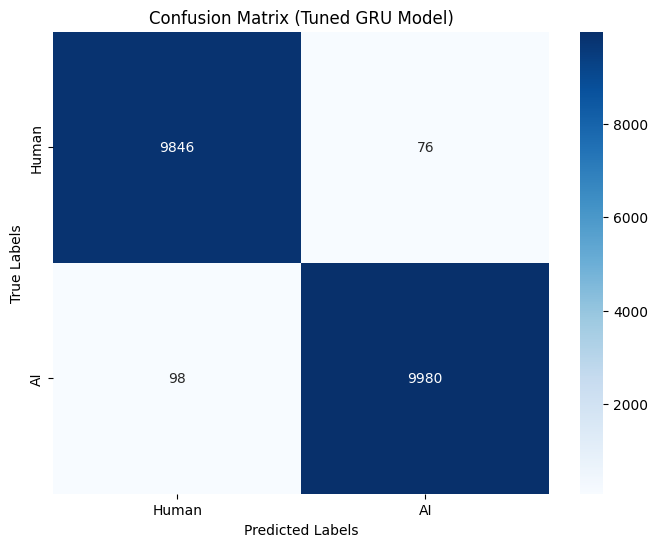

In [156]:
# Predict on the test set
y_pred_gru_best = model_GRU4.predict(X_test_padded)

# Convert predictions to binary (0 or 1)
y_pred_gru_best_binary = (y_pred_gru_best > 0.5).astype(int)

# Evaluate the GRU model
evaluate_model(y_test, y_pred_gru_best_binary, model_name="Tuned GRU Model", save_path="confusion_matrix_best_gru.png")

# FIN!